In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('City_Master.csv') 
df2 = pd.read_csv('Customer_and_bank details_p1.csv') 
df3 = pd.read_csv('Customer_campaign_details_p1.csv') 
df4 = pd.read_csv('Customer_Postal_Code_details.csv')
df5 = pd.read_csv('Customer_Response_data_p1.csv') 
df6 = pd.read_csv('Customer_social_economic_data_p1.csv') 
df7 = pd.read_csv('Region_code_master.csv')
df8 = pd.read_csv('State_Master.csv')  


In [2]:
data=pd.merge(df2, df3, on='Customer_id', how='inner')
data=pd.merge(data, df5, on='Customer_id', how='inner')
data=pd.merge(data, df6, on='Customer_id', how='inner')
data=pd.merge(data, df4, left_on='Customer_id', right_on='customer_id', how='inner')
data2=pd.merge(df8, df7, on='Region_Code', how='inner')
data=pd.merge(data, data2, on='State_Code', how='inner')
data=pd.merge(data, df1, on='City_Code', how='inner')
print(data.columns)
data.shape

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code_x', 'State_Code_x', 'City_Code',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'customer_id',
       'Postal Code', 'State_Name', 'Region_Code_y', 'Region_Name',
       'City_Name', 'State_Code_y'],
      dtype='object')


(37084, 32)

In [3]:
df=data.drop(columns=['customer_id','State_Code_y','Region_Code_y'])

In [4]:
df=df.rename(columns={"Region_Code_x": "Region_Code", "State_Code_x": "State_Code"})
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,State_Name,Region_Name,City_Name
0,1,56,services,married,high.school,no,no,yes,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
2,539,32,admin.,single,university.degree,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
3,540,36,services,married,high.school,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
4,997,31,blue-collar,married,basic.9y,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.856,5191.0,42420,Kentucky,South,Henderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,34349,37,housemaid,divorced,high.school,no,no,no,1,S47,...,no,-3.4,92.379,-29.8,0.753,5017.5,58103,North Dakota,Central,Fargo
37080,5870,58,unknown,married,basic.4y,no,yes,no,4,S48,...,no,1.1,93.994,-36.4,4.857,5191.0,82001,Wyoming,West,Cheyenne
37081,15864,43,unemployed,divorced,basic.9y,no,no,no,4,S48,...,no,1.4,93.918,-42.7,4.962,5228.1,82001,Wyoming,West,Cheyenne
37082,25858,37,admin.,single,high.school,no,no,no,4,S48,...,no,-1.8,93.075,-47.1,1.410,5099.1,82001,Wyoming,West,Cheyenne


In [5]:
df = df.drop_duplicates()

In [6]:
df.isnull().sum()

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code       0
State_Code        0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
Postal Code       0
State_Name        0
Region_Name       0
City_Name         0
dtype: int64

In [7]:
df1=df.replace("unknown", np.nan)
df1.isnull().sum()

Customer_id          0
age                  0
job                306
marital             72
education         1549
default           7700
housing            882
loan               882
Region_Code          0
State_Code           0
City_Code            0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
Postal Code          0
State_Name           0
Region_Name          0
City_Name            0
dtype: int64

In [8]:
df['job'].mode()[0]

'admin.'

In [9]:
df['job']= df['job'].str.replace("-"," ")
df['job']= df['job'].str.replace("."," ")
df['job']= df['job'].str.replace("unknown","admin")
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,State_Name,Region_Name,City_Name
0,1,56,services,married,high.school,no,no,yes,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
2,539,32,admin,single,university.degree,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
3,540,36,services,married,high.school,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
4,997,31,blue collar,married,basic.9y,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.856,5191.0,42420,Kentucky,South,Henderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,34349,37,housemaid,divorced,high.school,no,no,no,1,S47,...,no,-3.4,92.379,-29.8,0.753,5017.5,58103,North Dakota,Central,Fargo
37080,5870,58,admin,married,basic.4y,no,yes,no,4,S48,...,no,1.1,93.994,-36.4,4.857,5191.0,82001,Wyoming,West,Cheyenne
37081,15864,43,unemployed,divorced,basic.9y,no,no,no,4,S48,...,no,1.4,93.918,-42.7,4.962,5228.1,82001,Wyoming,West,Cheyenne
37082,25858,37,admin,single,high.school,no,no,no,4,S48,...,no,-1.8,93.075,-47.1,1.410,5099.1,82001,Wyoming,West,Cheyenne


In [27]:
mode_edu=df['education'].mode()[0]
df['education']= df['education'].str.replace(".4y","")
df['education']= df['education'].str.replace(".9y","")
df['education']= df['education'].str.replace(".6y","")
df['education']= df['education'].str.replace("." , " ")
df['education']= df['education'].str.replace("unknown" , mode_edu)
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,State_Name,Region_Name,City_Name
0,1,56,services,married,high school,no,no,yes,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
1,2,45,services,married,basic,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
2,539,32,admin,single,university degree,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
3,540,36,services,married,high school,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
4,997,31,blue collar,married,basic,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.856,5191.0,42420,Kentucky,South,Henderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,34349,37,housemaid,divorced,high school,no,no,no,1,S47,...,no,-3.4,92.379,-29.8,0.753,5017.5,58103,North Dakota,Central,Fargo
37080,5870,58,admin,married,basic,no,yes,no,4,S48,...,no,1.1,93.994,-36.4,4.857,5191.0,82001,Wyoming,West,Cheyenne
37081,15864,43,unemployed,divorced,basic,no,no,no,4,S48,...,no,1.4,93.918,-42.7,4.962,5228.1,82001,Wyoming,West,Cheyenne
37082,25858,37,admin,single,high school,no,no,no,4,S48,...,no,-1.8,93.075,-47.1,1.410,5099.1,82001,Wyoming,West,Cheyenne


In [11]:
df['marital'].value_counts().get('unknown',0)

72

In [12]:
df['marital'].mode()[0]

'married'

In [13]:
df['marital'].str.replace("unknown","married")
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,State_Name,Region_Name,City_Name
0,1,56,services,married,high school,no,no,yes,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
1,2,45,services,married,basic,unknown,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
2,539,32,admin,single,university degree,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
3,540,36,services,married,high school,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
4,997,31,blue collar,married,basic,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.856,5191.0,42420,Kentucky,South,Henderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,34349,37,housemaid,divorced,high school,no,no,no,1,S47,...,no,-3.4,92.379,-29.8,0.753,5017.5,58103,North Dakota,Central,Fargo
37080,5870,58,admin,married,basic,no,yes,no,4,S48,...,no,1.1,93.994,-36.4,4.857,5191.0,82001,Wyoming,West,Cheyenne
37081,15864,43,unemployed,divorced,basic,no,no,no,4,S48,...,no,1.4,93.918,-42.7,4.962,5228.1,82001,Wyoming,West,Cheyenne
37082,25858,37,admin,single,high school,no,no,no,4,S48,...,no,-1.8,93.075,-47.1,1.410,5099.1,82001,Wyoming,West,Cheyenne


In [14]:
df['housing'].value_counts().get('unknown',0)
df['housing'].mode()[0]
df['housing']=df['housing'].str.replace("unknown","yes")
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,State_Name,Region_Name,City_Name
0,1,56,services,married,high school,no,no,yes,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
1,2,45,services,married,basic,unknown,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
2,539,32,admin,single,university degree,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
3,540,36,services,married,high school,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
4,997,31,blue collar,married,basic,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.856,5191.0,42420,Kentucky,South,Henderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,34349,37,housemaid,divorced,high school,no,no,no,1,S47,...,no,-3.4,92.379,-29.8,0.753,5017.5,58103,North Dakota,Central,Fargo
37080,5870,58,admin,married,basic,no,yes,no,4,S48,...,no,1.1,93.994,-36.4,4.857,5191.0,82001,Wyoming,West,Cheyenne
37081,15864,43,unemployed,divorced,basic,no,no,no,4,S48,...,no,1.4,93.918,-42.7,4.962,5228.1,82001,Wyoming,West,Cheyenne
37082,25858,37,admin,single,high school,no,no,no,4,S48,...,no,-1.8,93.075,-47.1,1.410,5099.1,82001,Wyoming,West,Cheyenne


In [15]:
df['Region_Code'].value_counts().get('Na')

60

In [16]:
df['Region_Code'].mode()[0]

'4'

In [17]:
df['Region_Code']=df['Region_Code'].replace("Na",'4')
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,State_Name,Region_Name,City_Name
0,1,56,services,married,high school,no,no,yes,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
1,2,45,services,married,basic,unknown,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
2,539,32,admin,single,university degree,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
3,540,36,services,married,high school,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
4,997,31,blue collar,married,basic,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.856,5191.0,42420,Kentucky,South,Henderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,34349,37,housemaid,divorced,high school,no,no,no,1,S47,...,no,-3.4,92.379,-29.8,0.753,5017.5,58103,North Dakota,Central,Fargo
37080,5870,58,admin,married,basic,no,yes,no,4,S48,...,no,1.1,93.994,-36.4,4.857,5191.0,82001,Wyoming,West,Cheyenne
37081,15864,43,unemployed,divorced,basic,no,no,no,4,S48,...,no,1.4,93.918,-42.7,4.962,5228.1,82001,Wyoming,West,Cheyenne
37082,25858,37,admin,single,high school,no,no,no,4,S48,...,no,-1.8,93.075,-47.1,1.410,5099.1,82001,Wyoming,West,Cheyenne


In [18]:
df['default'].value_counts().get('unknown',0)

7700

In [19]:
df['default'].mode()[0]

'no'

In [20]:
df['default']=df['default'].replace("unknown","no")
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,State_Name,Region_Name,City_Name
0,1,56,services,married,high school,no,no,yes,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
1,2,45,services,married,basic,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
2,539,32,admin,single,university degree,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
3,540,36,services,married,high school,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
4,997,31,blue collar,married,basic,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.856,5191.0,42420,Kentucky,South,Henderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,34349,37,housemaid,divorced,high school,no,no,no,1,S47,...,no,-3.4,92.379,-29.8,0.753,5017.5,58103,North Dakota,Central,Fargo
37080,5870,58,admin,married,basic,no,yes,no,4,S48,...,no,1.1,93.994,-36.4,4.857,5191.0,82001,Wyoming,West,Cheyenne
37081,15864,43,unemployed,divorced,basic,no,no,no,4,S48,...,no,1.4,93.918,-42.7,4.962,5228.1,82001,Wyoming,West,Cheyenne
37082,25858,37,admin,single,high school,no,no,no,4,S48,...,no,-1.8,93.075,-47.1,1.410,5099.1,82001,Wyoming,West,Cheyenne


In [21]:
df['loan'].value_counts().get('unknown',0)

882

In [22]:
df['loan'].mode()[0]

'no'

In [23]:
df['loan']=df['loan'].replace("unknown","no")
df

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,State_Name,Region_Name,City_Name
0,1,56,services,married,high school,no,no,yes,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
1,2,45,services,married,basic,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
2,539,32,admin,single,university degree,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
3,540,36,services,married,high school,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.857,5191.0,42420,Kentucky,South,Henderson
4,997,31,blue collar,married,basic,no,no,no,3,S1,...,no,1.1,93.994,-36.4,4.856,5191.0,42420,Kentucky,South,Henderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37079,34349,37,housemaid,divorced,high school,no,no,no,1,S47,...,no,-3.4,92.379,-29.8,0.753,5017.5,58103,North Dakota,Central,Fargo
37080,5870,58,admin,married,basic,no,yes,no,4,S48,...,no,1.1,93.994,-36.4,4.857,5191.0,82001,Wyoming,West,Cheyenne
37081,15864,43,unemployed,divorced,basic,no,no,no,4,S48,...,no,1.4,93.918,-42.7,4.962,5228.1,82001,Wyoming,West,Cheyenne
37082,25858,37,admin,single,high school,no,no,no,4,S48,...,no,-1.8,93.075,-47.1,1.410,5099.1,82001,Wyoming,West,Cheyenne


In [24]:
df.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code,State_Code,...,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code,State_Name,Region_Name,City_Name
37079,34349,37,housemaid,divorced,high school,no,no,no,1,S47,...,no,-3.4,92.379,-29.8,0.753,5017.5,58103,North Dakota,Central,Fargo
37080,5870,58,admin,married,basic,no,yes,no,4,S48,...,no,1.1,93.994,-36.4,4.857,5191.0,82001,Wyoming,West,Cheyenne
37081,15864,43,unemployed,divorced,basic,no,no,no,4,S48,...,no,1.4,93.918,-42.7,4.962,5228.1,82001,Wyoming,West,Cheyenne
37082,25858,37,admin,single,high school,no,no,no,4,S48,...,no,-1.8,93.075,-47.1,1.410,5099.1,82001,Wyoming,West,Cheyenne
37083,35852,47,admin,divorced,high school,no,yes,no,4,S48,...,yes,-1.7,94.055,-39.8,0.711,4991.6,82001,Wyoming,West,Cheyenne


In [25]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 29)

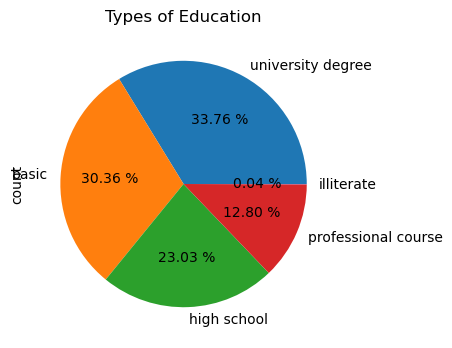

In [29]:
education_counts = df['education'].value_counts()
import matplotlib.pyplot as plt
# Plot a pie chart
education_counts.plot(kind='pie', title='Types of Education',autopct='%.2f %%', figsize=(4,4))

plt.show()

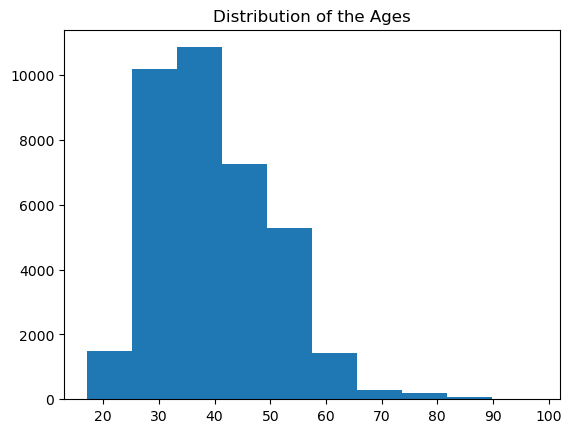

In [27]:
plt.hist(df.age)
plt.title("Distribution of the Ages")
plt.show()

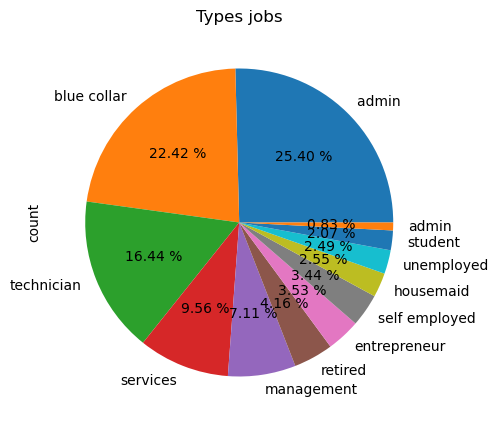

In [28]:
job_counts = df['job'].value_counts()
job_counts.plot(kind='pie', title='Types jobs',autopct='%.2f %%', figsize=(5,5))
plt.show()

<Axes: title={'center': 'Types of contact '}, xlabel='contact', ylabel='count'>

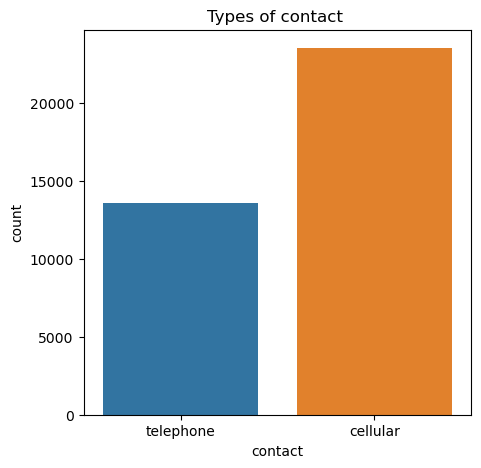

In [60]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(5,5)) # size figure
ax.set_title("Types of contact ")
sns.countplot(x='contact',data=df)

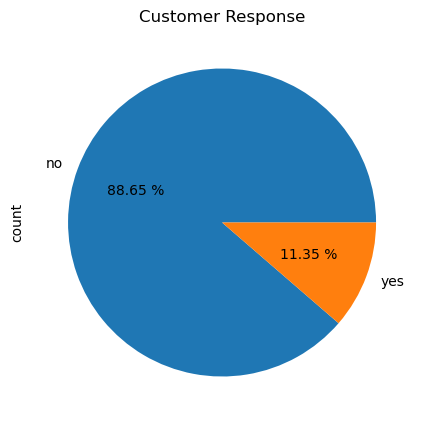

In [63]:
customer_response = df['y'].value_counts()
customer_response.plot(kind='pie', title='Customer Response',autopct='%.2f %%', figsize=(5,5))
plt.show()

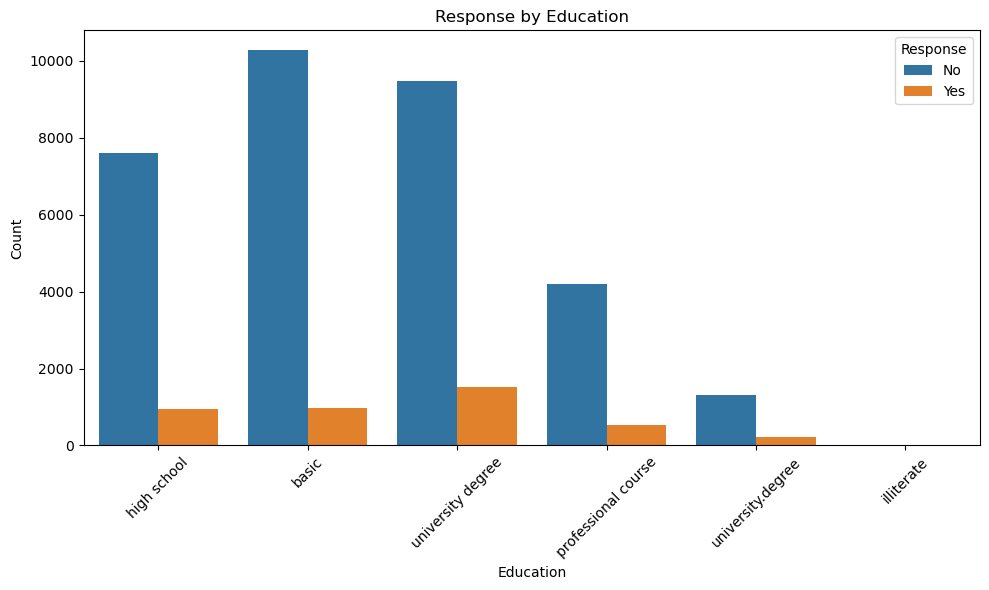

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=df)
plt.title('Response by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [62]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
numerical_stats = df[numerical_vars].describe()
numerical_stats

,Customer_id,age,duration,campaign,pdays,previous,y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Postal Code
count,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000,37084.000000
mean,18542.500000,40.042714,258.237946,2.569545,962.530849,0.172986,0.113472,0.082669,93.576076,-40.505183,3.621668,5167.058664,55202.625553
std,10705.373028,10.432965,258.730909,2.770611,186.773063,0.495681,0.317173,1.568997,0.578493,4.622045,1.733972,72.196605,32057.300954
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1040.000000
25%,9271.750000,32.000000,102.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,23223.000000
50%,18542.500000,38.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,56301.000000
75%,27813.250000,47.000000,319.250000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,90008.000000
max,37084.000000,98.000000,4918.000000,56.000000,999.000000,7.000000,1.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,99301.000000


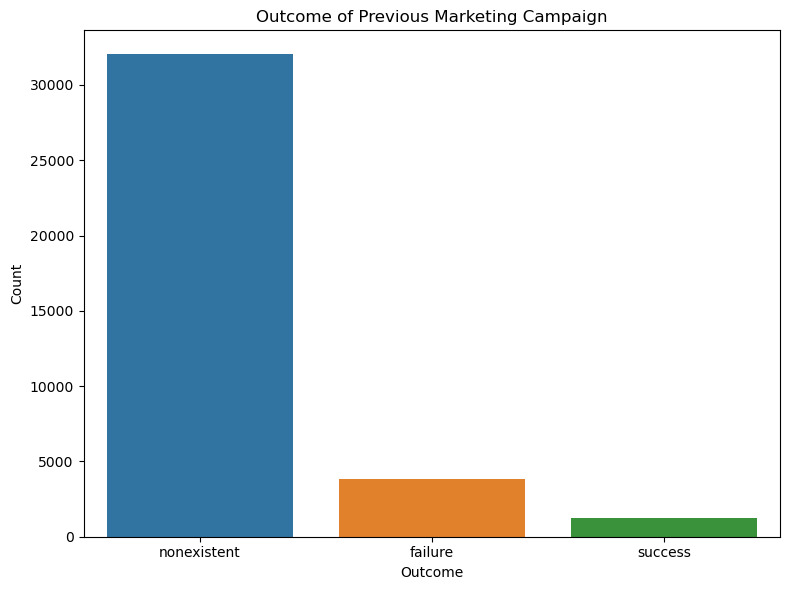

In [71]:
# Count occurrences of each 'poutcome'
poutcome_counts = df['poutcome'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=poutcome_counts.index, y=poutcome_counts.values)

# Adding titles and labels
plt.title('Outcome of Previous Marketing Campaign')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()


In [72]:
from scipy import stats
age_yes = df[df['y'] == 'yes']['age']
age_no = df[df['y'] == 'no']['age']
t_stat, p_value = stats.ttest_ind(age_yes, age_no)
print(f"T-statistic: {t_stat}, p-value: {p_value}")
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean ages between 'yes' and 'no' groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean ages between 'yes' and 'no' groups.")


T-statistic: 6.079714701670921, p-value: 1.2156980465666949e-09
Reject the null hypothesis. There is a significant difference in the mean ages between 'yes' and 'no' groups.
